In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline
data = pd.read_csv("datasplattrs.csv", encoding="UTF-8")

In [18]:
#Transform Strings to Lists (when we read csv data in, the lists become strings)
data['title1_tokenized']=data['title1_tokenized'].apply(ast.literal_eval)
data['title2_tokenized']=data['title2_tokenized'].apply(ast.literal_eval)
data['title1_nonumner']=data['title1_nonumner'].apply(ast.literal_eval)
data['title2_nonumner']=data['title2_nonumner'].apply(ast.literal_eval)

In [20]:
#Retain columns we need
cols =['title1_zh',
 'title2_zh',
 'title1_tokenized',
 'title2_tokenized',
 'title1_ner',
 'title2_ner',
 'title1_nonumner',
 'title2_nonumner',
 'lenword',
 'lenchar',
 'wordmatch',
 'hypextra',
 'nerwordmatch',
 'nerhypextra',
       'iskey',
       'label']
data=data[cols]

In [21]:
data.loc[0,'title2_tokenized']

['警方', '辟谣', '鸟巢', '大会', '每人', '领', '5万', '', '', '老人', '坚持', '进', '京']

In [22]:
data.head()

,title1_zh,title2_zh,title1_tokenized,title2_tokenized,title1_ner,title2_ner,title1_nonumner,title2_nonumner,lenword,lenchar,wordmatch,hypextra,nerwordmatch,nerhypextra,iskey,label
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,"[2017, 养老, 保险, 新增, 两, 项, 农村, 老人, 人人, 申领, 领到]","[警方, 辟谣, 鸟巢, 大会, 每人, 领, 5万, , , 老人, 坚持, 进, 京]",[[]],"[[(23, 25, 'company', '京')]]",[],"[(company, 京)]",2,6,1,12,0,1,2,unrelated
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"[深圳, 早晚, 儿子, 出, 10, 年, 深圳, 人均, GDP, 超, 香港]","[深圳, GDP, 首, 超, 香港, 深圳, 统计局, 辟谣, 差距, 缩小]","[[(4, 7, 'location', '深圳'), (19, 23, 'time', '...","[[(0, 3, 'location', '深圳'), (7, 10, 'location'...","[(location, 深圳), (time, 10年), (location, 深圳), ...","[(location, 深圳), (location, 香港), (org, 深圳统计局)]",1,8,5,5,2,2,1,unrelated
2,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"[深圳, 早晚, 儿子, 出, 10, 年, 深圳, 人均, GDP, 超, 香港]","[GDP, 首, 超, 香港, 深圳, 澄清, 差, 一点点]","[[(4, 7, 'location', '深圳'), (19, 23, 'time', '...","[[(5, 8, 'location', '香港'), (8, 11, 'location'...","[(location, 深圳), (time, 10年), (location, 深圳), ...","[(location, 香港), (location, 深圳)]",3,13,5,4,2,1,0,unrelated
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,"[深圳, 早晚, 儿子, 出, 10, 年, 深圳, 人均, GDP, 超, 香港]","[去年, 深圳, GDP, 首, 超, 香港, 深圳, 统计局, 辟谣, 差, 611亿]","[[(4, 7, 'location', '深圳'), (19, 23, 'time', '...","[[(0, 3, 'time', '去年'), (2, 5, 'location', '深圳...","[(location, 深圳), (time, 10年), (location, 深圳), ...","[(time, 去年), (location, 深圳), (location, 香港), (...",0,7,5,6,2,3,1,unrelated
4,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,"[大蒜, 鉴别, 地沟油, 方法, 鉴别, 地沟油]","[吃, 30, 年, 食用油, 知道, 片, 大蒜, 轻松, 鉴别, 地沟油]",[[]],"[[(2, 6, 'time', '30年')]]",[],"[(time, 30年)]",4,3,5,7,0,1,0,agreed


In [23]:
data.shape

(320552, 16)

In [24]:
data.label.value_counts()

unrelated    219313
agreed        92973
disagreed      8266
Name: label, dtype: int64

In [29]:
perct=list(data['label'].value_counts()/len(data))

In [42]:
perct[0]

0.68417292670144

In [27]:
#Prepare Training Data
x_train=data[['lenword','lenchar','wordmatch','hypextra','nerwordmatch','nerhypextra','iskey']]

maplabeltonum = dict(zip(set(data['label']), range(len(data['label']))))
print(maplabeltonum)

y_train=[maplabeltonum[x] for x in data['label']]

{'unrelated': 0, 'disagreed': 1, 'agreed': 2}


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.20,random_state=101)

In [43]:
def classify(array):
    ls=[]
    for row in array:
        row=[row[0]/perct[0], row[1]/perct[2], row[2]/perct[1]]
        ls.append(row.index(max(row)))
    return ls

In [44]:
mapnumtolabel = dict(zip(range(len(data['label'])),set(data['label'])))
mapnumtolabel 

{0: 'unrelated', 1: 'disagreed', 2: 'agreed'}

In [ ]:
y_val=[mapnumtolabel[x] for x in y_val]

In [131]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [132]:
#In the final classification decision,divide each category's probability by its proportion in training data
def weaccuracy(true,mat,perct):
    unrelated=mat[0][0]/len(true)
    disagreed=mat[1][1]/len(true)
    agreed=mat[2][2]/len(true)
    return (1/16*unrelated+1/5*disagreed+1/15*agreed)/(1/16*perct[0]+1/5*perct[2]+1/15*perct[1])

## XGboost Classifier

In [34]:
import xgboost as xgb

In [35]:
# Set our parameters for XGboost
params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'mlogloss'
params['eta'] = 0.02
params['max_depth']=3
params['num_class'] = 3
params['base_score'] = 0.025

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_val, label=y_val)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-mlogloss:1.08192	valid-mlogloss:1.08198
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 50 rounds.
[10]	train-mlogloss:0.942346	valid-mlogloss:0.942781
[20]	train-mlogloss:0.83888	valid-mlogloss:0.839588
[30]	train-mlogloss:0.760092	valid-mlogloss:0.76094
[40]	train-mlogloss:0.698966	valid-mlogloss:0.699877
[50]	train-mlogloss:0.650914	valid-mlogloss:0.651867
[60]	train-mlogloss:0.612625	valid-mlogloss:0.613614
[70]	train-mlogloss:0.581957	valid-mlogloss:0.582974
[80]	train-mlogloss:0.557296	valid-mlogloss:0.558347
[90]	train-mlogloss:0.537192	valid-mlogloss:0.538266
[100]	train-mlogloss:0.520748	valid-mlogloss:0.521829
[110]	train-mlogloss:0.507281	valid-mlogloss:0.508355
[120]	train-mlogloss:0.496214	valid-mlogloss:0.497262
[130]	train-mlogloss:0.487061	valid-mlogloss:0.488097
[140]	train-mlogloss:0.479417	valid-mlogloss:0.480444
[150]	train-mlogloss:0.473015	valid-mlogloss:0.47403

In [36]:
d_val = xgb.DMatrix(X_val)
yprob = bst.predict(d_val)
yprob=np.array(yprob)

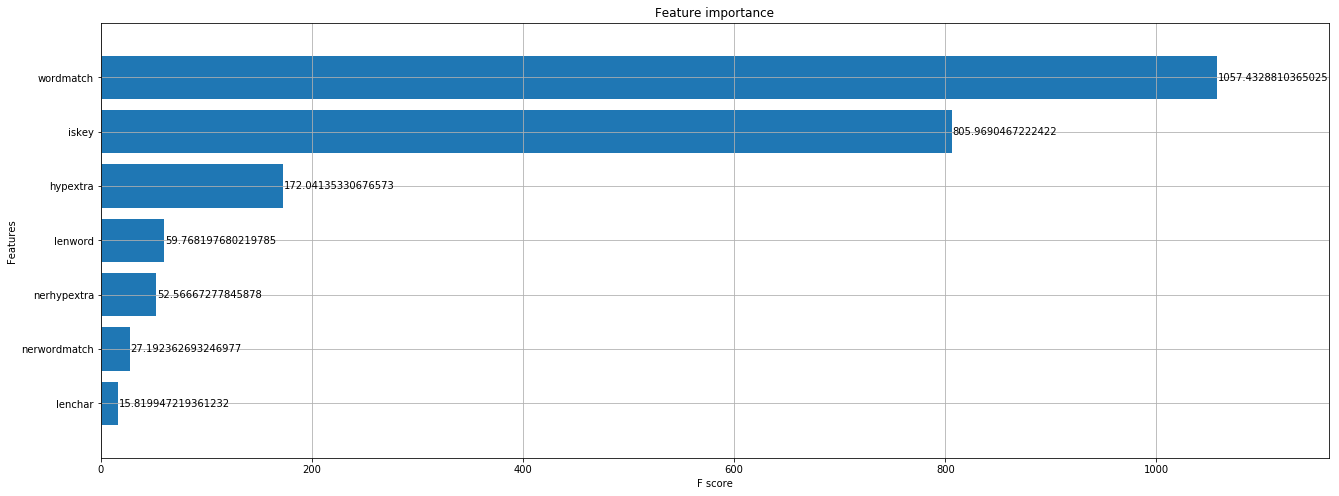

In [38]:
#Examine each feature's importance by criteria gain ratio
fig, ax = plt.subplots(figsize=(22,8))
xgb.plot_importance(bst, max_num_features=50, height=0.8, ax=ax,importance_type='gain')
plt.show()

In [45]:
preddctree=[mapnumtolabel[x] for x in classify(yprob)]
print(classification_report(y_val,preddctree))
print(confusion_matrix(y_val,preddctree))

             precision    recall  f1-score   support

     agreed       0.57      0.87      0.69     18707
  disagreed       0.15      0.75      0.25      1682
  unrelated       0.91      0.56      0.70     43722

avg / total       0.79      0.66      0.68     64111

[[16364    55  2288]
 [  230  1267   185]
 [12024  7007 24691]]


Text(0.5,257.44,'Predicted label')

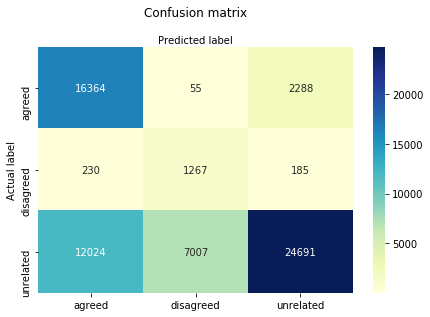

In [46]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix(y_val,preddctree)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticks([0.5,1.5,2.5])
ax.set_yticks([0.5,1.5,2.5])
# ... and label them with the respective list entries
ax.set_xticklabels(['agreed','disagreed','unrelated'])
ax.set_yticklabels(['agreed','disagreed','unrelated'])
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [124]:
accuracy = accuracy_score(y_val,preddctree)
weightacc=weaccuracy(y_val,confusion_matrix(y_val,preddctree),perct)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Weighted Accuracy: %.2f%%" % (weightacc*100.0))

Accuracy: 66.01%
Weighted Accuracy: 67.77%


# Naive Bayes Classification 

### Multinomial NB

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [49]:
mnb_pipeline = Pipeline([
    ('mnb', MultinomialNB())])

In [50]:
#Set parameters set
grid_params = {
  'mnb__alpha': np.linspace(0.5, 1.5, 6),
  'mnb__fit_prior': [True, False],  
}

In [51]:
#Search for the best parameters combination using cross validation
clf = GridSearchCV(mnb_pipeline, grid_params)
clf.fit(X_train, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)
clf.get_params

Best Score:  0.7829988184416689
Best Params:  {'mnb__alpha': 0.5, 'mnb__fit_prior': True}


<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [83]:
predmulnb=[mapnumtolabel[x] for x in classify(clf.predict_proba(X_val))]
print(classification_report(y_val,predmulnb))
print(confusion_matrix(y_val,predmulnb))

             precision    recall  f1-score   support

     agreed       0.63      0.72      0.67     18707
  disagreed       0.10      0.65      0.18      1682
  unrelated       0.89      0.66      0.76     43722

avg / total       0.80      0.68      0.72     64111

[[13378  2290  3039]
 [  145  1089   448]
 [ 7698  7001 29023]]


Text(0.5,257.44,'Predicted label')

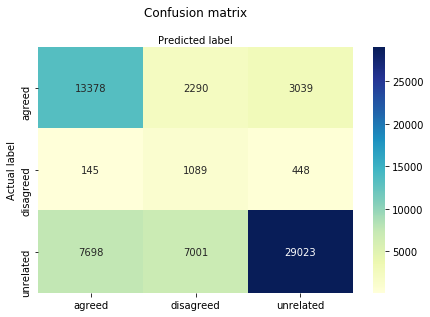

In [53]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix(y_val,predmulnb)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticks([0.5,1.5,2.5])
ax.set_yticks([0.5,1.5,2.5])
# ... and label them with the respective list entries
ax.set_xticklabels(['agreed','disagreed','unrelated'])
ax.set_yticklabels(['agreed','disagreed','unrelated'])
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [126]:
accuracy = accuracy_score(y_val,predmulnb)
weightacc=weaccuracy(y_val,confusion_matrix(y_val,predmulnb),perct)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Weighted Accuracy: %.2f%%" % (weightacc* 100.0))

Accuracy: 67.84%
Weighted Accuracy: 69.32%


### Gaussian NB

In [56]:
clf1 = GaussianNB(priors=[0.68417292670144, 0.290040305473059, 0.02578676782550101])
clf1.fit(X_train, y_train)

GaussianNB(priors=[0.68417292670144, 0.290040305473059, 0.02578676782550101])

In [64]:
predgaunb=[mapnumtolabel[x] for x in classify(clf1.predict_proba(X_val))]
print(classification_report(y_val,predgaunb))
print(confusion_matrix(y_val,predgaunb))

             precision    recall  f1-score   support

     agreed       0.84      0.35      0.50     18707
  disagreed       0.04      0.96      0.07      1682
  unrelated       0.95      0.27      0.41     43722

avg / total       0.89      0.31      0.43     64111

[[ 6611 11509   587]
 [   23  1609    50]
 [ 1196 30917 11609]]


Text(0.5,257.44,'Predicted label')

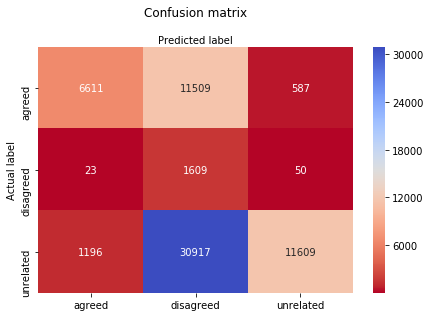

In [65]:
fig,ax=plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix(y_val,predgaunb)), annot=True, cmap="coolwarm_r" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticks([0.5,1.5,2.5])
ax.set_yticks([0.5,1.5,2.5])
# ... and label them with the respective list entries
ax.set_xticklabels(['agreed','disagreed','unrelated'])
ax.set_yticklabels(['agreed','disagreed','unrelated'])
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [127]:
accuracy = accuracy_score(y_val,predgaunb)
weightacc=weaccuracy(y_val,confusion_matrix(y_val,predgaunb),perct)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Weighted Accuracy: %.2f%%" % (weightacc* 100.0))

Accuracy: 30.93%
Weighted Accuracy: 35.00%


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr_pipeline = Pipeline([('lr', LogisticRegression())])

In [69]:
#Search for the best parameters combination using cross validation
grid_params = {
  'lr__penalty': ['l2'],
  'lr__C': [1, 5, 10],
  'lr__max_iter': [100],
  'lr__multi_class':['ovr', 'multinomial'],
  'lr__class_weight':['balanced'],
  'lr__solver':['newton-cg','lbfgs','sag'] 
}
clf2 = GridSearchCV(lr_pipeline, grid_params)
clf2.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lr__penalty': ['l2'], 'lr__C': [1, 5, 10], 'lr__max_iter': [100], 'lr__multi_class': ['ovr', 'multinomial'], 'lr__class_weight': ['balanced'], 'lr__solver': ['newton-cg', 'lbfgs', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
print("Best Score: ", clf2.best_score_)
print("Best Params: ", clf2.best_params_)

Best Score:  0.7399791764967381
Best Params:  {'lr__C': 1, 'lr__class_weight': 'balanced', 'lr__max_iter': 100, 'lr__multi_class': 'ovr', 'lr__penalty': 'l2', 'lr__solver': 'sag'}


In [71]:
clf2.predict_proba(X_val)[0:3]

array([[0.30047621, 0.18529451, 0.51422928],
       [0.29949319, 0.18677592, 0.5137309 ],
       [0.02494365, 0.25234928, 0.72270707]])

In [75]:
predlogit=[mapnumtolabel[x] for x in clf2.predict(X_val)]
print(classification_report(y_val,predlogit))
print(confusion_matrix(y_val,predlogit))

             precision    recall  f1-score   support

     agreed       0.60      0.83      0.70     18707
  disagreed       0.25      0.51      0.33      1682
  unrelated       0.89      0.71      0.79     43722

avg / total       0.79      0.74      0.75     64111

[[15530    47  3130]
 [  201   858   623]
 [10167  2557 30998]]


Text(0.5,257.44,'Predicted label')

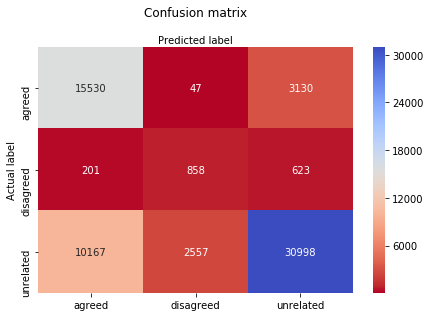

In [76]:
fig,ax=plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix(y_val,predlogit)), annot=True, cmap="coolwarm_r" ,fmt='g')
ax.xaxis.set_label_position("top")
# ... and label them with the respective list entries
ax.set_xticklabels(['agreed','disagreed','unrelated'])
ax.set_yticklabels(['agreed','disagreed','unrelated'])
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [129]:
accuracy = accuracy_score(y_val,predlogit)
weightacc=weaccuracy(y_val,confusion_matrix(y_val,predlogit),perct)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Weighted Accuracy: %.2f%%" % (weightacc* 100.0))

Accuracy: 73.91%
Weighted Accuracy: 74.42%
